In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# style.use('bmh') or
plt.style.use('bmh')
%matplotlib inline

%config IPCompleter.greedy=True 


In [2]:
# Cargamos el conjunto de entrenamiento

dataset_train = pd.read_csv('../Google_Stock_Price_Train.csv')

#Identificamos las variables regresoras y formateamos a datos tipo numpy

dataset_train.iloc[:, 1:4].head()

,Open,High,Low
0,325.25,332.83,324.97
1,331.27,333.87,329.08
2,329.83,330.75,326.89
3,328.34,328.77,323.68
4,322.04,322.29,309.46


In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
# Conjunto de entrenamiento IMPORTANTE QUE ESTE EN FORMATO NUMPY
training_set=dataset_train.iloc[:, 1:4].values
training_set

array([[325.25, 332.83, 324.97],
       [331.27, 333.87, 329.08],
       [329.83, 330.75, 326.89],
       ...,
       [793.7 , 794.23, 783.2 ],
       [783.33, 785.93, 778.92],
       [782.75, 782.78, 770.41]])

In [5]:
# Escalamos las variables regresoras con MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368, 0.09640129, 0.09044931],
       [0.09701243, 0.09834351, 0.09823458],
       [0.09433366, 0.09251685, 0.09408623],
       ...,
       [0.95725128, 0.95807422, 0.95844067],
       [0.93796041, 0.94257381, 0.95033338],
       [0.93688146, 0.93669113, 0.93421352]])

In [7]:
# Conformamos los conjuntos de entrenamiento. La red neuronal, tomara para cada registro a estimar, los 60 anteriores en cada
# variable regresora. En este  caso son 2 variables regresoras (valor de apertura y maximo tomado por las acciones)

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0:3])# Valores de las variables regresoras. Se toman periodos de 60 dias
                                                    # anteriores al dia de la prediccion
    y_train.append(training_set_scaled[i, 0])       # Dia de la prediccion
    
X_train, y_train = np.array(X_train), np.array(y_train) # Formateo de los valores

In [8]:
# Redimension de la variable X_train a formato soportado por Keras. ([batch, timesteps, feature])
# Batch = X_train[0]
# timesteps = X_train[1]
# feature = Cantidad de variables regresoras

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
regressor = Sequential()

In [11]:
# Creamos la capa LSTM recordando poner en el input_shape el formato de tensor de keras [batch, timesteps, feature],
# en este caso, no hace falta pasarle el batch puesto que ya lo asume

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))

# Regularizacion por Dropout: desactivamos un 20% de neuronas
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))

# Regularizacion por Dropout: desactivamos un 20% de neuronas
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 50))

# Regularizacion por Dropout: desactivamos un 20% de neuronas
regressor.add(Dropout(0.2))

In [15]:
# Capa de salida

regressor.add(Dense(units = 1))

In [16]:
#Compilamos el modelo

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# Entrenamos el modelo

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 42s 370ms/step - loss: 0.0458
Epoch 2/100
38/38 [==============================] - 15s 385ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 16s 412ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 15s 399ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 14s 366ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 14s 365ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 14s 365ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 14s 364ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 14s 365ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 14s 365ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 14s 367ms/step - loss: 0.0049
Epoch 12/100
38/38 [==============================] - 14s 366ms/step - loss: 0.0043
E

In [18]:
# Cargamos conjunto de testeo

dataset_test = pd.read_csv('../Google_Stock_Price_Test.csv')

# Tomamos 2 variables regresoras
dataset_test.iloc[:, 1:4].head()

,Open,High,Low
0,778.81,789.63,775.80
1,788.36,791.34,783.16
2,786.08,794.48,785.02
3,795.26,807.90,792.20
4,806.40,809.97,802.83


In [19]:
real_stock_price = dataset_test.iloc[:, 1:4].values
real_stock_price

array([[778.81, 789.63, 775.8 ],
       [788.36, 791.34, 783.16],
       [786.08, 794.48, 785.02],
       [795.26, 807.9 , 792.2 ],
       [806.4 , 809.97, 802.83],
       [807.86, 809.13, 803.51],
       [805.  , 808.15, 801.37],
       [807.14, 807.39, 799.17],
       [807.48, 811.22, 806.69],
       [807.08, 807.14, 800.37],
       [805.81, 806.21, 800.99],
       [805.12, 809.48, 801.8 ],
       [806.91, 806.91, 801.69],
       [807.25, 820.87, 803.74],
       [822.3 , 825.9 , 817.82],
       [829.62, 835.77, 825.06],
       [837.81, 838.  , 827.01],
       [834.71, 841.95, 820.44],
       [814.66, 815.84, 799.8 ],
       [796.86, 801.25, 790.52]])

In [20]:
# Conformamos un conjunto global con el train y test

dataset_total = pd.concat((dataset_train[['Open','High','Low']], dataset_test[['Open','High','Low']]), axis = 0)

In [21]:
# Visualizamos

dataset_total.head()

,Open,High,Low
0,325.25,332.83,324.97
1,331.27,333.87,329.08
2,329.83,330.75,326.89
3,328.34,328.77,323.68
4,322.04,322.29,309.46


In [22]:
# Los inputs seran todos los datos de 60 dias anteriores al primer dia de test

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [23]:
inputs

array([[779.  , 780.48, 775.54],
       [779.66, 779.66, 770.75],
       [777.71, 789.38, 775.87],
       [786.66, 792.28, 780.58],
       [783.76, 788.13, 782.06],
       [781.22, 781.22, 773.  ],
       [781.65, 783.95, 776.  ],
       [779.8 , 785.85, 777.5 ],
       [787.85, 801.61, 785.57],
       [798.24, 804.6 , 798.03],
       [803.3 , 803.97, 796.03],
       [795.  , 799.5 , 794.  ],
       [804.9 , 815.18, 804.82],
       [816.68, 816.68, 805.14],
       [806.34, 806.98, 796.32],
       [801.  , 803.49, 791.5 ],
       [808.35, 815.49, 793.59],
       [795.47, 796.86, 784.  ],
       [782.89, 789.49, 775.54],
       [778.2 , 781.65, 763.45],
       [767.25, 769.95, 759.03],
       [750.66, 770.36, 750.56],
       [774.5 , 785.19, 772.55],
       [783.4 , 795.63, 780.19],
       [779.94, 791.23, 771.67],
       [791.17, 791.17, 752.18],
       [756.54, 760.78, 750.38],
       [755.6 , 757.85, 727.54],
       [746.97, 764.42, 746.97],
       [755.2 , 766.36, 750.51],
       [76

In [24]:
#inputs = inputs.reshape(-1,1)

In [25]:
inputs = sc.transform(inputs)

In [26]:
# Conformamos el conjunto de test con las mismas caracteristicas que hicimos el conjunto de entrenamiento

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0:3])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3)) # Redimensionamos

predicted_stock_price = regressor.predict(X_test)


In [27]:
predicted_stock_price=np.hstack((predicted_stock_price,np.ones([predicted_stock_price.shape[0],1], predicted_stock_price.dtype)))
predicted_stock_price=np.hstack((predicted_stock_price,np.ones([predicted_stock_price.shape[0],1], predicted_stock_price.dtype)))

In [28]:
predicted_stock_price

array([[0.92990446, 1.        , 1.        ],
       [0.9272007 , 1.        , 1.        ],
       [0.9305204 , 1.        , 1.        ],
       [0.93518734, 1.        , 1.        ],
       [0.94289756, 1.        , 1.        ],
       [0.9520389 , 1.        , 1.        ],
       [0.957461  , 1.        , 1.        ],
       [0.95816326, 1.        , 1.        ],
       [0.95715845, 1.        , 1.        ],
       [0.9592751 , 1.        , 1.        ],
       [0.96030414, 1.        , 1.        ],
       [0.96052504, 1.        , 1.        ],
       [0.9614271 , 1.        , 1.        ],
       [0.96219337, 1.        , 1.        ],
       [0.9659858 , 1.        , 1.        ],
       [0.9751662 , 1.        , 1.        ],
       [0.98636985, 1.        , 1.        ],
       [0.99461555, 1.        , 1.        ],
       [0.9970752 , 1.        , 1.        ],
       [0.9852793 , 1.        , 1.        ]], dtype=float32)

In [29]:
# Aplicamos la transformacion inversa del escalador

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [30]:
predicted_stock_price

array([[778.9994 , 816.68   , 805.13995],
       [777.54596, 816.68   , 805.13995],
       [779.3305 , 816.68   , 805.13995],
       [781.8393 , 816.68   , 805.13995],
       [785.984  , 816.68   , 805.13995],
       [790.898  , 816.68   , 805.13995],
       [793.8127 , 816.68   , 805.13995],
       [794.19025, 816.68   , 805.13995],
       [793.6501 , 816.68   , 805.13995],
       [794.7879 , 816.68   , 805.13995],
       [795.34106, 816.68   , 805.13995],
       [795.45984, 816.68   , 805.13995],
       [795.9447 , 816.68   , 805.13995],
       [796.3566 , 816.68   , 805.13995],
       [798.39526, 816.68   , 805.13995],
       [803.3303 , 816.68   , 805.13995],
       [809.35297, 816.68   , 805.13995],
       [813.7855 , 816.68   , 805.13995],
       [815.1077 , 816.68   , 805.13995],
       [808.7667 , 816.68   , 805.13995]], dtype=float32)

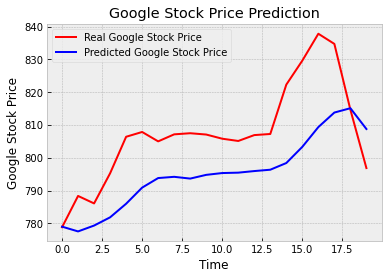

In [31]:
plt.plot(real_stock_price[:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()